iou 0.13333333333333333
remaining_index [1]
iou 0.325
remaining_index [1, 3]
iou 0.0
remaining_index [1, 3, 2]
iou 0.023255813953488372
remaining_index [1, 3, 2, 5]
iou 0.0
remaining_index [1, 3, 2, 5, 4]
iou 0.9574468085106383
iou 0.0
remaining_index [2]
iou 0.0
remaining_index [2, 5]
iou 0.0
remaining_index [2, 5, 4]
iou 0.0
remaining_index [5]
iou 0.0
remaining_index [5, 4]
iou 0.0
remaining_index [4]
selected_indices [0, 1, 2, 5, 4]
-----------------------
Original Bounding Box


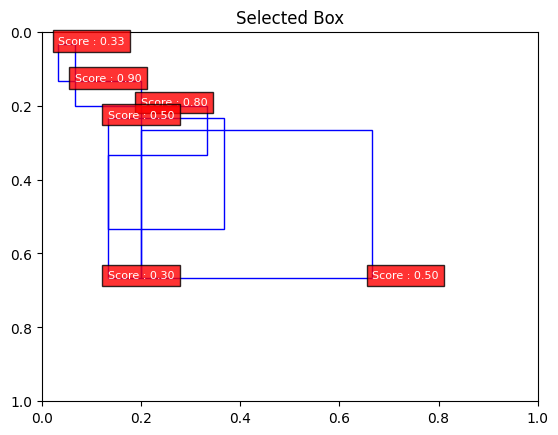

Remain Bonding Box, iou 0.8


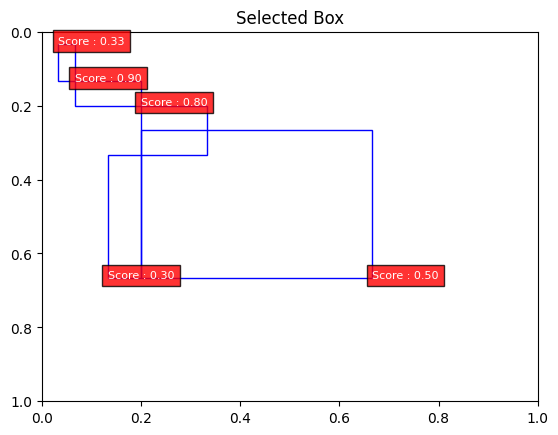

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_max = max(x1, x2)
    y_max = max(y1, y2)
    x_min = min(x1 + w1, x2 + w2)
    y_min = min(y1 + h2, y2 + h2)

    x_intersection_area = max(0, x_min - x_max) # max(0, ...) 음수 방지용 함수, 같은 위치에 있지 않을 경우 0으로 처리
    y_intersection_area = max(0, y_min - y_max)

    intersection_area = x_intersection_area * y_intersection_area

    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    print(f'iou {iou}')
    
    return iou

def non_max_supression(boxes, scores, iou_threshold=0.8):
    sorted_indices = np.argsort(scores)[::-1] # 내림차순으로 원소 인덱스 반환
    selected_indices = []

    while len(sorted_indices) > 0:
        current_indices = sorted_indices[0]
        selected_indices.append(current_indices)
        current_box = boxes[current_indices]
        
        sorted_indices = sorted_indices[1:]
        remaining_index = []

        for i in sorted_indices:
            iou = calculate_iou(current_box, boxes[i])
            if iou < iou_threshold:
                remaining_index.append(i)
                print(f'remaining_index {remaining_index}')

        sorted_indices = remaining_index

    return selected_indices

boxes = np.array([[10, 20, 30, 30], [30, 30, 50, 50], [100, 100, 30, 40],
                  [20, 35, 55, 80], [20, 100, 30, 50], [5, 5, 10, 20]])
scores = np.array([0.9, 0.8, 0.5, 0.5, 0.3, 0.33])

selected_indices = non_max_supression(boxes, scores)
selected_boxes = boxes[selected_indices]
print(f'selected_indices {selected_indices}')

def plot_boxes(boxes, scores, title="Selected Box"):
    fig, ax = plt.subplots(1)
    ax.set_title(title)

    # -- orgin image size
    img_width, img_height = 150, 150

    for box, score in zip(boxes, scores):
        x1, y1, x2, y2 = box
        x1_, y1_ = x1 / img_width, y1 / img_height
        x2_, y2_ = x2 / img_width, y2 / img_height

        width, height = x2_ - x1_ , y2_ - y1_
        rect = patches.Rectangle((x1_, y1_), width, height, linewidth=1, edgecolor='b',
                                 facecolor = "none")

        ax.add_patch(rect)
        ax.text(x1_, y1_, f"Score : {score :.2f}", color="white",
                fontsize=8, bbox=dict(facecolor='red', alpha=0.8))
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.invert_yaxis()
    plt.show()

print('-----------------------')
print("Original Bounding Box")
plot_boxes(boxes, scores)

print("Remain Bonding Box, iou 0.8")
plot_boxes(selected_boxes, scores[selected_indices])